In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
os.chdir('/Users/Lenovo/Desktop/EBAC')
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [54]:
data = pd.read_csv('Iris3.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [56]:
data_final = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
data_final

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [58]:
wcss = []
for index in range(1, 11):
    kmeans = KMeans(n_clusters = index, init = 'k-means++', random_state = 2)
    kmeans.fit(data_final)

    wcss.append(kmeans.inertia_)

TypeError: 'str' object is not callable

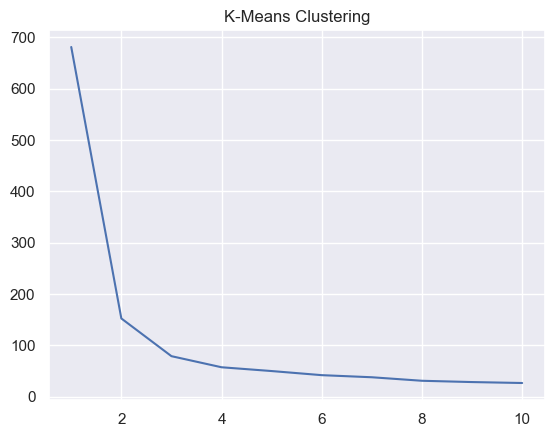

In [60]:
# Graficacion del "Codo de Jambu"
sb.set()
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS') # Weighted cluster sum of squares

In [62]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
cluster_values = kmeans.fit_predict(data_final)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [64]:
# Criterio de Silueta ("Silhouette")
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Transformamos la informacion a numpy porque Silhouette necesita la informacion en este formato
X = data_final.to_numpy()
for j in range(2, 12):
    kmeans = KMeans(n_clusters = j, random_state = 42)
    kmeans.fit_predict(X)
    # Calculamos el Score de Silueta
    score = silhouette_score(X, kmeans.labels_, metric = 'euclidean')
    print('Score Silhouette: ', 'k =', j, ':', score)

Score Silhouette:  k = 2 : 0.6810461692117467
Score Silhouette:  k = 3 : 0.5511916046195927
Score Silhouette:  k = 4 : 0.49764331793219296
Score Silhouette:  k = 5 : 0.493080406719353
Score Silhouette:  k = 6 : 0.3678464984712254
Score Silhouette:  k = 7 : 0.3542978877198859
Score Silhouette:  k = 8 : 0.3446797218056206
Score Silhouette:  k = 9 : 0.3155887853389787
Score Silhouette:  k = 10 : 0.3014143745325155
Score Silhouette:  k = 11 : 0.26873562164120385


# Tranformacion a dos columnas por PCA

In [66]:
fields = data.iloc[:, [0,1,2,3]].values
print(fields)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [68]:
# Algoritmo pCA
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca.fit(fields)
fields = pca.transform(fields)
fields

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [70]:
# Calculo de las distancias de cada punto a cada centroide
wcss2 = []
for index in range(1, 11):
    kmeans = KMeans(n_clusters = index, init = 'k-means++', random_state = 2)
    kmeans.fit(fields)

    wcss2.append(kmeans.inertia_)

TypeError: 'str' object is not callable

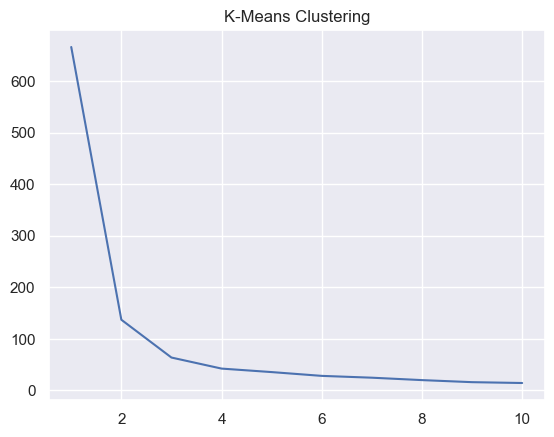

In [72]:
# Graficacion del "Codo de Jambu"
sb.set()
plt.plot(range(1, 11), wcss2)
plt.title('K-Means Clustering')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS2') # Weighted cluster sum of squares

In [74]:
#Prediccion de cada grupo
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
cluster_values2 = kmeans.fit_predict(fields)
print(cluster_values2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


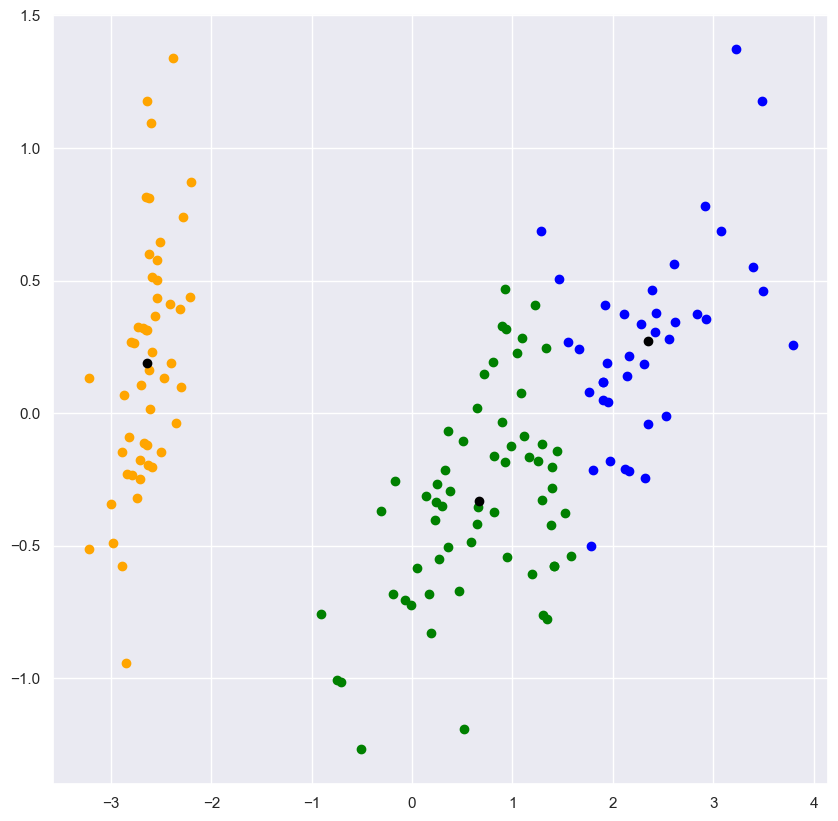

In [76]:
plt.figure(figsize = (10,10))
plt.scatter(fields[cluster_values2 == 0,0], fields[cluster_values2 == 0, 1], c = 'blue', label = 'Cluster1')
plt.scatter(fields[cluster_values2 == 1,0], fields[cluster_values2 == 1, 1], c = 'orange', label = 'Cluster2')
plt.scatter(fields[cluster_values2 == 2,0], fields[cluster_values2 == 2, 1], c = 'green', label = 'Cluster3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroides')

In [80]:
# Transformamos la informacion a numpy porque Silhouette necesita la informacion en este formato
X = fields
for j in range(2, 12):
    kmeans = KMeans(n_clusters = j, random_state = 42)
    kmeans.fit_predict(X)
    # Calculamos el Score de Silueta
    score = silhouette_score(X, kmeans.labels_, metric = 'euclidean')
    print('Score Silhouette: ', 'k =', j, ':', score)

Score Silhouette:  k = 2 : 0.7056703225102108
Score Silhouette:  k = 3 : 0.597676421954799
Score Silhouette:  k = 4 : 0.5577409232246783
Score Silhouette:  k = 5 : 0.5100407194899202
Score Silhouette:  k = 6 : 0.40319738737442673
Score Silhouette:  k = 7 : 0.3868263997713608
Score Silhouette:  k = 8 : 0.4407603324965402
Score Silhouette:  k = 9 : 0.40201438763663605
Score Silhouette:  k = 10 : 0.4158865801753246
Score Silhouette:  k = 11 : 0.3994325519305235


# Conclusion

In [ ]:
Aunque los resultados puedan ser un poco similares, el reduciar los datos por PC